# 8 school example

自分で Jupyter Notebook を実行したい場合は、
* ツールバーの Cell -> All Output -> Clear
* あとは上のセルから順にツールバーの再生ボタンで実行するか、Cell -> RunAll で全実行

以下、[PyStanのGetting Started](https://pystan.readthedocs.io/en/latest/getting_started.html)のコピーです。

## インストール

* 前提：python3 環境は anaconda とかで各自導入してあること
* 前提：C++ コンパイラが使えること
* PyStan の導入は `$ pip install pystan` でOK

## ライブラリ読み込み
* matplotlibがjupyter内で描画されるように
* pystanのimport

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pystan

## stan のコード
別ファイルで書いても良いが、文字列で与えてもOK

* data
   + $J$
   + $\{y_j\}^J_{j=1}$
   + $\{\sigma_j\}^J_{j=1}$
* parameters
   + $\mu$
   + $\tau$
   + $\{\eta_j\}^J_{j=1}$
* transformed parameters
   + $\theta_j = \mu + \tau \eta_j \; (j=1 \cdots J)$
* model
   + $\eta_j \sim \mathcal{N}(0, 1)$
   + $y_j \sim \mathcal{N}(\theta_j, \sigma_j)$

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

## data
* ディクショナリでデータを作る
* key = データの変数名(文字列)
* value = スカラー値、ベクトル値はリスト

In [3]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

## pystan の実行
stanコードの与え方
* `model_code=schools_code` : 上記のように文字列で与える
* `file='8schools.stan'` : stanコードのファイルで与える

In [4]:
%time fit = pystan.stan(model_code=schools_code, data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


CPU times: user 1.02 s, sys: 87.4 ms, total: 1.11 s
Wall time: 21.3 s


## 計算結果の取り出し

In [5]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']
print(mu)

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

[  8.28308323   6.70995021  10.58464435 ...,  14.72405813  19.97423125
   1.51285476]


In [6]:
print(fit)

Inference for Stan model: anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu         7.79    0.19   5.52  -2.71   4.28    7.6   11.2  19.86    845    1.0
tau         7.0    0.21   5.81   0.28    2.6   5.56   9.86  21.61    743    1.0
eta[0]     0.41    0.02   0.95  -1.61  -0.17   0.43   1.04   2.26   2000    1.0
eta[1]     0.02    0.02   0.85  -1.74  -0.54-2.8e-3    0.6   1.77   1337    1.0
eta[2]     -0.2    0.02    0.9  -1.93  -0.82  -0.22    0.4   1.62   1870    1.0
eta[3]  -1.2e-3    0.02   0.89  -1.79  -0.59   0.01   0.58   1.71   2000    1.0
eta[4]    -0.35    0.02   0.86  -2.06  -0.92  -0.36   0.22   1.38   1699    1.0
eta[5]     -0.2    0.02   0.87  -1.94   -0.8   -0.2   0.37   1.53   1716    1.0
eta[6]     0.39    0.02   0.89  -1.47  -0.19   0.41   0.98   2.11   1604    1.0
eta[7]     0.

## グラフの描画

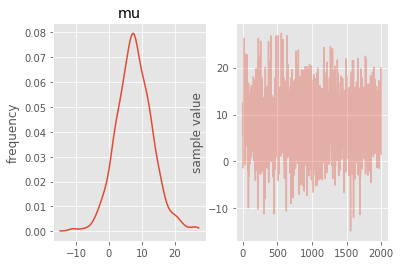

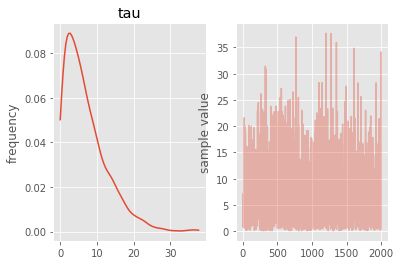

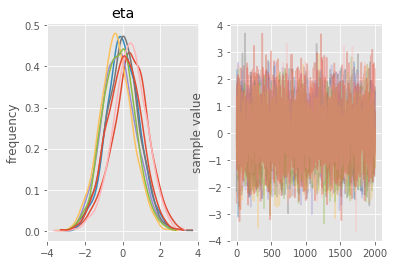

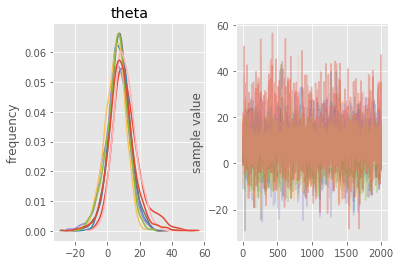

In [7]:
fig = fit.plot('mu')
fig = fit.plot('tau')
fig = fit.plot('eta')
fig = fit.plot('theta')